# LEAST ANGLE REGRESSION:

Regression is a supervised machine learning task that can predict continuous values (real numbers), as compared to classification, that can predict categorical or discrete values.
Least Angle Regression (LARS) is an algorithm used in regression for high dimensional data (i.e., data with a large number of attributes). Least Angle Regression is somewhat similar to forward stepwise regression. Since it is used with data that has lots of attributes, at each step, LARS finds the attribute which is most highly correlated to the target value. There may be more than one attribute that has the same correlation. In this scenario, LARS averages the attributes and proceeds in a direction that is at the same angle to the attributes. This is exactly why this algorithm is called Least Angle regression. Basically, LARS makes leaps in the most optimally calculated direction without overfitting the model. 

## Algorithm:

Normalize all values to have zero mean and unit variance.

Find a variable that is most highly correlated to the residual. Move the regression line in this direction until we reach another variable that has the same or higher correlation.

Note : Residual is the difference between the observed value and the predicted value. Variable, here implies an attribute. 
 
When we have two variables that have the same correlation, move the regression line at an angle that is in between (i.e., least angle between the two variables).

Continue this until all of our data is exhausted or until you think the model is big and ‘general’ enough.

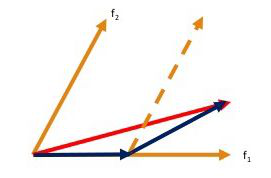

Mathematically, LARS works as follows : 

All coefficients, ‘B’ are set to 0.

The predictor, xj is found that is most correlated to y.

Increase the coefficient Bj in the direction that is most correlated with y and stop when you find some other predictor xk the has equal or higher correlation than xj.

Extend (Bj, Bk) in a direction that is equiangular (has the same angle) to both xj and xk.

Continue and repeat until all predictors are in the model.

**Example**

we will demonstrate how to use the LARS Regression algorithm.

First, let’s introduce a standard regression dataset. We will use the housing dataset.

The housing dataset is a standard machine learning dataset comprising 506 rows of data with 13 numerical input variables and a numerical target variable.

Using a test harness of repeated stratified 10-fold cross-validation with three repeats, a naive model can achieve a mean absolute error (MAE) of about 6.6. A top-performing model can achieve a MAE on this same test harness of about 1.9. This provides the bounds of expected performance on this dataset.

The dataset involves predicting the house price given details of the house’s suburb in the American city of Boston.

Datasets are in House Price Prediction

housing.csv

housing.names.txt

No need to download the dataset; we will download it automatically as part of our worked examples.

The example below downloads and loads the dataset as a Pandas DataFrame and summarizes the shape of the dataset and the first five rows of data.

In [1]:

# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# summarize shape
print(dataframe.shape)
# summarize first few lines
print(dataframe.head())

(506, 14)
        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


The scikit-learn Python machine learning library provides an implementation of the LARS penalized regression algorithm via the Lars class.


In [9]:
# evaluate an lars regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lars
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Lars()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 3.432 (0.552)


Running the example evaluates the LARS Regression algorithm on the housing dataset and reports the average MAE across the three repeats of 10-fold cross-validation.

Your specific results may vary given the stochastic nature of the learning algorithm. Consider running the example a few times.

In this case, we can see that the model achieved a MAE of about 3.432.

We may decide to use the LARS Regression as our final model and make predictions on new data.

This can be achieved by fitting the model on all available data and calling the predict() function, passing in a new row of data.

We can demonstrate this with a complete example, listed below.

In [10]:
# make a prediction with a lars regression model on the dataset
from pandas import read_csv
from sklearn.linear_model import Lars
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Lars()
# fit model
model.fit(X, y)
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 29.904




### Advantages of using LARS:

Computationally as fast as forward selection but may sometimes be more accurate.

Numerically very efficient when the number of features is much larger than the number of data instances.

It can easily be modified to produce solutions for other estimators.

Disadvantages of using LARS:

LARS is highly sensitive to noise and can produce unpredictable results sometimes.

## Summary:

In this we discovered how to develop and evaluate LARS Regression models in Python.

LARS Regression provides an alternate way to train a Lasso regularized linear regression model that adds a penalty to the loss function during training.

How to evaluate a LARS Regression model and use a final model to make predictions for new data.